Lesson: The same data can tell completely different stories depending on what timeframe you select.
In reality, this stock has grown steadily over 3 years, with one significant dip.
But by cherry-picking timeframes, we can create three contradictory narratives:
  1. 'The stock is crashing!' - by showing only the declining period
  2. 'The stock is soaring!' - by showing only the recovery period


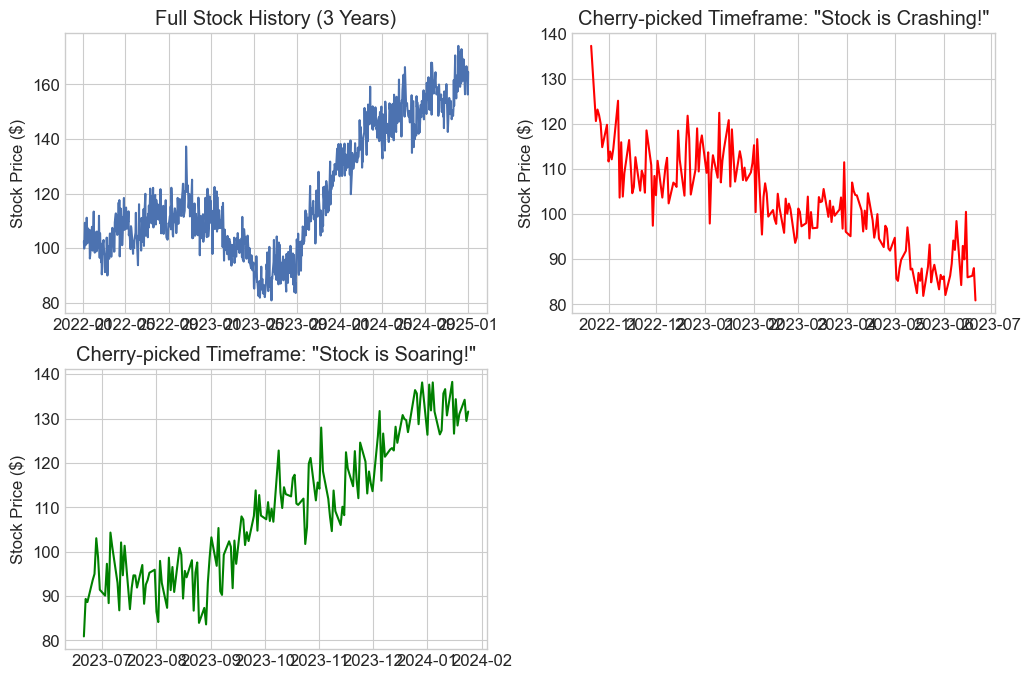

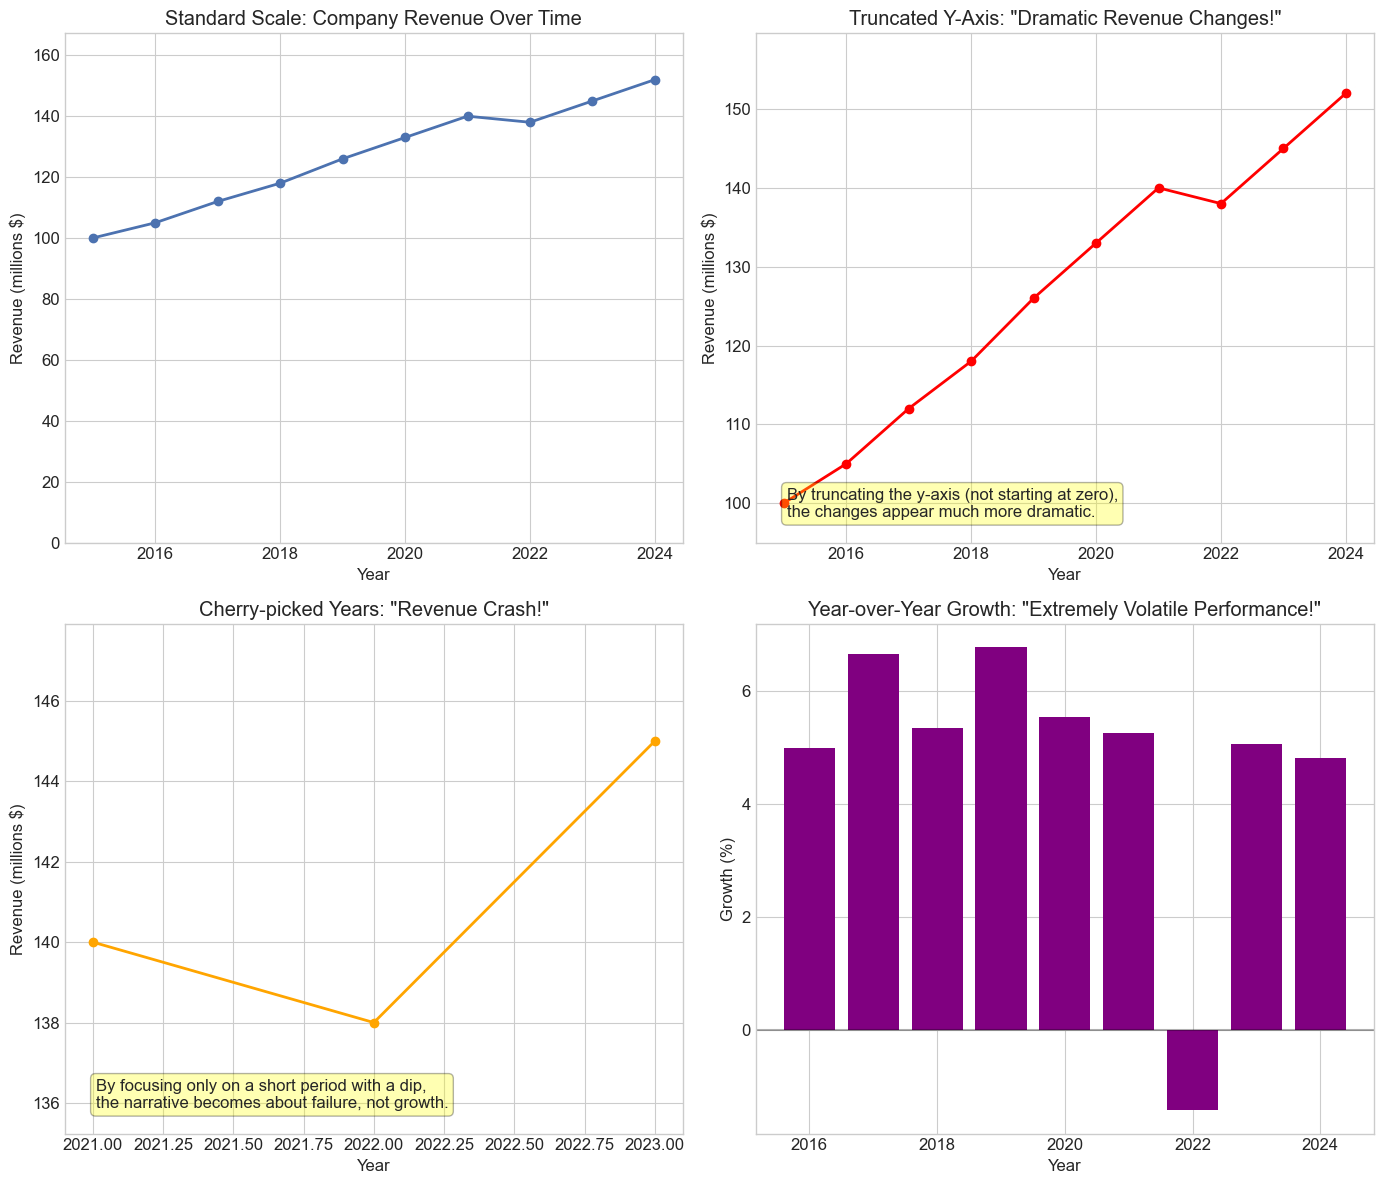

Lesson: Axis manipulation can dramatically change perception without changing the data.
We showed the same revenue data in four ways:

1. Standard scale with y-axis from zero: Shows the true context of steady growth
2. Truncated y-axis: Makes normal fluctuations look dramatic
3. Cherry-picked timeframe: Focuses only on a temporary dip to create a 'crash' narrative
4. Different metric (growth instead of absolute values): Emphasizes volatility

When looking at charts, always check:
- Does the y-axis start at zero? If not, the changes are visually exaggerated
- What timeframe is shown? Is it cherry-picked to show a particular narrative?
- What metric is being used? Absolute numbers and percentages tell different stories


In [4]:
# Lying with Statistics: Examples for a Basic Probability Course
# ============================================================
#
# This notebook demonstrates how statistics can be manipulated to mislead the audience.
# Each example includes code, visualizations, and explanations that can be used in a 
# basic probability course to teach students about statistical deception.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

# Set a seed for reproducibility
np.random.seed(42)
random.seed(42)

# Setting plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# %% [markdown]
# ## Example 1: Cherry-picking the Timeframe
# 
# One of the most common ways to lie with statistics is to carefully select the timeframe 
# that best supports your narrative. In financial reporting, political campaigns, and many 
# other contexts, choosing when to start and end your data can completely change the story.
#
# In this example, we'll generate a stock price history over 3 years and show how different 
# slices of the same data can be used to support contradictory narratives.

# %%
def cherry_picking_timeframe():
    # Generate data for a stock price over 3 years
    dates = pd.date_range(start='2022-01-01', end='2025-01-01', freq='B')  # Business days
    
    # Simulate stock with overall upward trend but with a significant dip
    n_points = len(dates)
    
    # Generate the trend with a dip
    trend = np.linspace(100, 160, n_points)  # Overall upward trend
    # Add a significant dip in the middle
    dip = -40 * np.exp(-0.5 * ((np.arange(n_points) - n_points//2) / (n_points//10))**2)
    
    # Add some noise and seasonality to make it look realistic
    noise = np.random.normal(0, 5, n_points)
    seasonality = 5 * np.sin(np.arange(n_points) * 2 * np.pi / 63)  # ~ 3 month cycle
    
    stock_price = trend + dip + noise + seasonality
    
    # Create a DataFrame
    stock_data = pd.DataFrame({
        'Date': dates,
        'Price': stock_price
    })
    
    # Plot the full data and cherry-picked sections
    plt.figure(figsize=(12, 8))
    
    # Full timeline
    plt.subplot(2, 2, 1)
    plt.plot(stock_data['Date'], stock_data['Price'])
    plt.title('Full Stock History (3 Years)')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    
    # MANIPULATION #1: Only show declining period
    # Find the peak before the dip
    peak_idx = stock_data['Price'].iloc[:n_points//2].idxmax()
    # Find the bottom of the dip
    bottom_idx = stock_data['Price'].iloc[peak_idx:n_points//2 + n_points//4].idxmin()
    
    plt.subplot(2, 2, 2)
    plt.plot(stock_data['Date'].iloc[peak_idx:bottom_idx+1], 
             stock_data['Price'].iloc[peak_idx:bottom_idx+1], 
             color='red')
    plt.title('Cherry-picked Timeframe: "Stock is Crashing!"')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    
    # MANIPULATION #2: Only show recovery period
    plt.subplot(2, 2, 3)
    plt.plot(stock_data['Date'].iloc[bottom_idx:bottom_idx+n_points//5], 
             stock_data['Price'].iloc[bottom_idx:bottom_idx+n_points//5], 
             color='green')
    plt.title('Cherry-picked Timeframe: "Stock is Soaring!"')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    

    
    print("Lesson: The same data can tell completely different stories depending on what timeframe you select.")
    print("In reality, this stock has grown steadily over 3 years, with one significant dip.")
    print("But by cherry-picking timeframes, we can create three contradictory narratives:")
    print("  1. 'The stock is crashing!' - by showing only the declining period")
    print("  2. 'The stock is soaring!' - by showing only the recovery period")
    # print("  3. 'Recent performance shows dramatic growth!' - by using a truncated y-axis")
    
    return stock_data

# Run and display the first example
stock_data = cherry_picking_timeframe()



# %% [markdown]
# ## Example 5: Manipulating Axis Scales
# 
# The way we visualize data can dramatically change how it's perceived. One of the simplest and most common manipulations is changing the scale of the axes, particularly the y-axis.
#
# This example demonstrates how the same data can look completely different depending on how the axes are scaled and what ranges are shown.

# %%
def axis_manipulation():
    # Create data for a company's growth over 10 years
    years = list(range(2015, 2025))
    
    # Revenue with steady growth but a slight dip in 2022
    revenue = [100, 105, 112, 118, 126, 133, 140, 138, 145, 152]
    
    # Create a DataFrame
    company_data = pd.DataFrame({
        'Year': years,
        'Revenue': revenue
    })
    
    # Calculate year-over-year growth
    company_data['YoY_Growth'] = company_data['Revenue'].pct_change() * 100
    
    # Plotting examples of axis manipulation
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # Plot 1: Standard scaling that shows the full context
    axes[0, 0].plot(company_data['Year'], company_data['Revenue'], marker='o', linewidth=2)
    axes[0, 0].set_title('Standard Scale: Company Revenue Over Time')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Revenue (millions $)')
    axes[0, 0].set_ylim(0, max(revenue) * 1.1)  # Start from zero to show true scale
    axes[0, 0].grid(True)
    
    # MANIPULATION #1: Zoomed in y-axis to exaggerate changes
    axes[0, 1].plot(company_data['Year'], company_data['Revenue'], marker='o', linewidth=2, color='red')
    axes[0, 1].set_title('Truncated Y-Axis: "Dramatic Revenue Changes!"')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Revenue (millions $)')
    axes[0, 1].set_ylim(min(revenue) * 0.95, max(revenue) * 1.05)  # Very narrow range
    axes[0, 1].grid(True)
    
    # MANIPULATION #2: Focus on just the dip years
    dip_data = company_data[company_data['Year'].isin([2021, 2022, 2023])]
    axes[1, 0].plot(dip_data['Year'], dip_data['Revenue'], marker='o', linewidth=2, color='orange')
    axes[1, 0].set_title('Cherry-picked Years: "Revenue Crash!"')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Revenue (millions $)')
    axes[1, 0].set_ylim(min(dip_data['Revenue']) * 0.98, max(dip_data['Revenue']) * 1.02)
    axes[1, 0].grid(True)
    
    # MANIPULATION #3: Switch to YoY growth to emphasize volatility
    axes[1, 1].bar(company_data['Year'][1:], company_data['YoY_Growth'][1:], color='purple')
    axes[1, 1].set_title('Year-over-Year Growth: "Extremely Volatile Performance!"')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Growth (%)')
    axes[1, 1].grid(True)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add annotations explaining the manipulation
    axes[0, 1].annotate('By truncating the y-axis (not starting at zero),\nthe changes appear much more dramatic.', 
                     xy=(0.05, 0.05), xycoords='axes fraction', 
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))
    
    axes[1, 0].annotate('By focusing only on a short period with a dip,\nthe narrative becomes about failure, not growth.', 
                     xy=(0.05, 0.05), xycoords='axes fraction', 
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))
    
    fig.tight_layout()
    plt.show()
    
    print("Lesson: Axis manipulation can dramatically change perception without changing the data.")
    print("We showed the same revenue data in four ways:")
    print("\n1. Standard scale with y-axis from zero: Shows the true context of steady growth")
    print("2. Truncated y-axis: Makes normal fluctuations look dramatic")
    print("3. Cherry-picked timeframe: Focuses only on a temporary dip to create a 'crash' narrative")
    print("4. Different metric (growth instead of absolute values): Emphasizes volatility")
    print("\nWhen looking at charts, always check:")
    print("- Does the y-axis start at zero? If not, the changes are visually exaggerated")
    print("- What timeframe is shown? Is it cherry-picked to show a particular narrative?")
    print("- What metric is being used? Absolute numbers and percentages tell different stories")
    
    return company_data

# Run and display the fifth example
company_data = axis_manipulation()

# %% [markdown]
# ## Example 6: The Survivorship Bias
# 
# Survivorship bias is a logical error where we focus only on people or things that "survived" a selection process while overlooking those that did not, leading to false conclusions.
#
# The classic example comes from World War II when statistician Abraham Wald was analyzing how to better protect bombers. Initial analysis suggested reinforcing the areas that showed the most damage on returning planes, but Wald realized this was wrong - the returning planes had survived despite their damage. The planes that didn't return were likely hit in other areas.


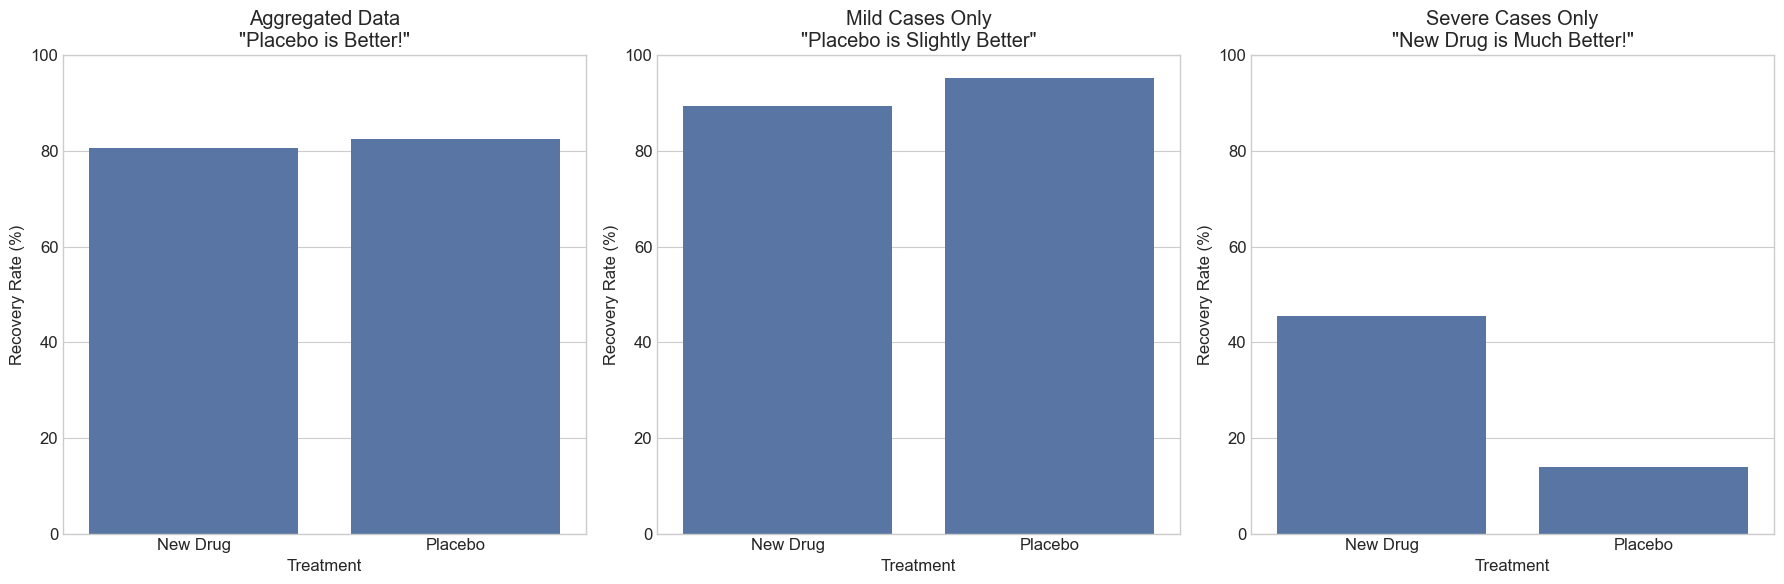

Aggregated Recovery Rates:
  Treatment  count  sum  Recovery_Rate
0  New Drug   1000  806      80.600000
1   Placebo    950  783      82.421053

Recovery Rates by Severity:
  Treatment Condition_Severity  count  sum  Recovery_Rate
0  New Drug               Mild    800  715         89.375
1  New Drug             Severe    200   91         45.500
2   Placebo               Mild    800  762         95.250
3   Placebo             Severe    150   21         14.000

Lesson: Simpson's Paradox shows how aggregating data can reverse trends and hide important subgroup differences.
Here's what's happening:
1. In the total population, the placebo appears to have a higher recovery rate
2. BUT when we break it down by severity, the new drug is:
   - Slightly worse for mild cases (90% vs 95%)
   - MUCH better for severe cases (50% vs 20%)
3. The paradox occurs because of the uneven distribution:
   - Most drug patients (80%) had severe cases (harder to treat)
   - Most placebo patients (25%) had mild 

In [5]:
# %% [markdown]
# ## Example 2: Simpson's Paradox
# 
# Simpson's paradox is a phenomenon where a trend appears in different groups of data but disappears or reverses when these groups are combined. This is a particularly powerful way to mislead with statistics because both the aggregated and disaggregated results are mathematically correct!
#
# In our example below, we'll simulate a medical trial for a new drug. When looking at all patients together, the placebo seems more effective. But when we break down by condition severity, the new drug is actually better for severe cases, which make up the majority of treated patients.

# %%
def simpsons_paradox():
    # Create a dataset for a hypothetical drug trial
    np.random.seed(42)
    
    # Group A: Mild cases
    group_a_treatment = pd.DataFrame({
        'Treatment': 'New Drug',
        'Condition_Severity': 'Mild',
        'Recovered': np.random.choice([0, 1], size=800, p=[0.1, 0.9]),  # 90% recovery
        'Age': np.random.normal(40, 10, 800)
    })
    
    group_a_control = pd.DataFrame({
        'Treatment': 'Placebo',
        'Condition_Severity': 'Mild',
        'Recovered': np.random.choice([0, 1], size=800, p=[0.05, 0.95]),  # 95% recovery
        'Age': np.random.normal(40, 10, 800)
    })
    
    # Group B: Severe cases
    group_b_treatment = pd.DataFrame({
        'Treatment': 'New Drug',
        'Condition_Severity': 'Severe',
        'Recovered': np.random.choice([0, 1], size=200, p=[0.5, 0.5]),  # 50% recovery
        'Age': np.random.normal(65, 10, 200)
    })
    
    group_b_control = pd.DataFrame({
        'Treatment': 'Placebo',
        'Condition_Severity': 'Severe',
        'Recovered': np.random.choice([0, 1], size=150, p=[0.8, 0.2]),  # 20% recovery
        'Age': np.random.normal(65, 10, 150)
    })
    
    # Combine all data
    trial_data = pd.concat([group_a_treatment, group_a_control, 
                            group_b_treatment, group_b_control])
    
    # Calculate recovery rates by treatment and condition severity
    agg_data = trial_data.groupby(['Treatment', 'Condition_Severity'])['Recovered'].agg(
        ['count', 'sum']).reset_index()
    agg_data['Recovery_Rate'] = agg_data['sum'] / agg_data['count'] * 100
    
    # Calculate aggregated recovery rates by treatment only
    agg_total = trial_data.groupby(['Treatment'])['Recovered'].agg(
        ['count', 'sum']).reset_index()
    agg_total['Recovery_Rate'] = agg_total['sum'] / agg_total['count'] * 100
    
    # Visualize the paradox
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot 1: Aggregated data - MISLEADING VIEW. add also the error bars
    sns.barplot(x='Treatment', y='Recovery_Rate', data=agg_total, ax=axes[0])
    # axes[0].errorbar(x='Treatment', y='Recovery_Rate', yerr=agg_total['Recovery_Rate'].std(), ax=axes[0])
    axes[0].set_title('Aggregated Data\n"Placebo is Better!"')
    axes[0].set_ylabel('Recovery Rate (%)')
    # add the error bars
    axes[0].set_ylim(0, 100)
    
    # Plot 2: Mild cases only
    mild_data = agg_data[agg_data['Condition_Severity'] == 'Mild']
    sns.barplot(x='Treatment', y='Recovery_Rate', data=mild_data, ax=axes[1])
    # axes[1].errorbar(x='Treatment', y='Recovery_Rate', yerr=mild_data['Recovery_Rate'].std(), ax=axes[1])
    axes[1].set_title('Mild Cases Only\n"Placebo is Slightly Better"')
    axes[1].set_ylabel('Recovery Rate (%)')
    axes[1].set_ylim(0, 100)
    
    # Plot 3: Severe cases only
    severe_data = agg_data[agg_data['Condition_Severity'] == 'Severe']
    sns.barplot(x='Treatment', y='Recovery_Rate', data=severe_data, ax=axes[2])
    # axes[2].errorbar(x='Treatment', y='Recovery_Rate', yerr=severe_data['Recovery_Rate'].std(), ax=axes[2])
    axes[2].set_title('Severe Cases Only\n"New Drug is Much Better!"')
    axes[2].set_ylabel('Recovery Rate (%)')
    axes[2].set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
    # Print the data tables to see the raw numbers
    print("Aggregated Recovery Rates:")
    print(agg_total[['Treatment', 'count', 'sum', 'Recovery_Rate']])
    print("\nRecovery Rates by Severity:")
    print(agg_data)
    
    print("\nLesson: Simpson's Paradox shows how aggregating data can reverse trends and hide important subgroup differences.")
    print("Here's what's happening:")
    print("1. In the total population, the placebo appears to have a higher recovery rate")
    print("2. BUT when we break it down by severity, the new drug is:")
    print("   - Slightly worse for mild cases (90% vs 95%)")
    print("   - MUCH better for severe cases (50% vs 20%)")
    print("3. The paradox occurs because of the uneven distribution:")
    print("   - Most drug patients (80%) had severe cases (harder to treat)")
    print("   - Most placebo patients (25%) had mild cases (easier to recover)")
    print("4. Looking only at the aggregated data would lead to incorrect conclusions!")
    
    return trial_data

# Run and display the second example
trial_data = simpsons_paradox()



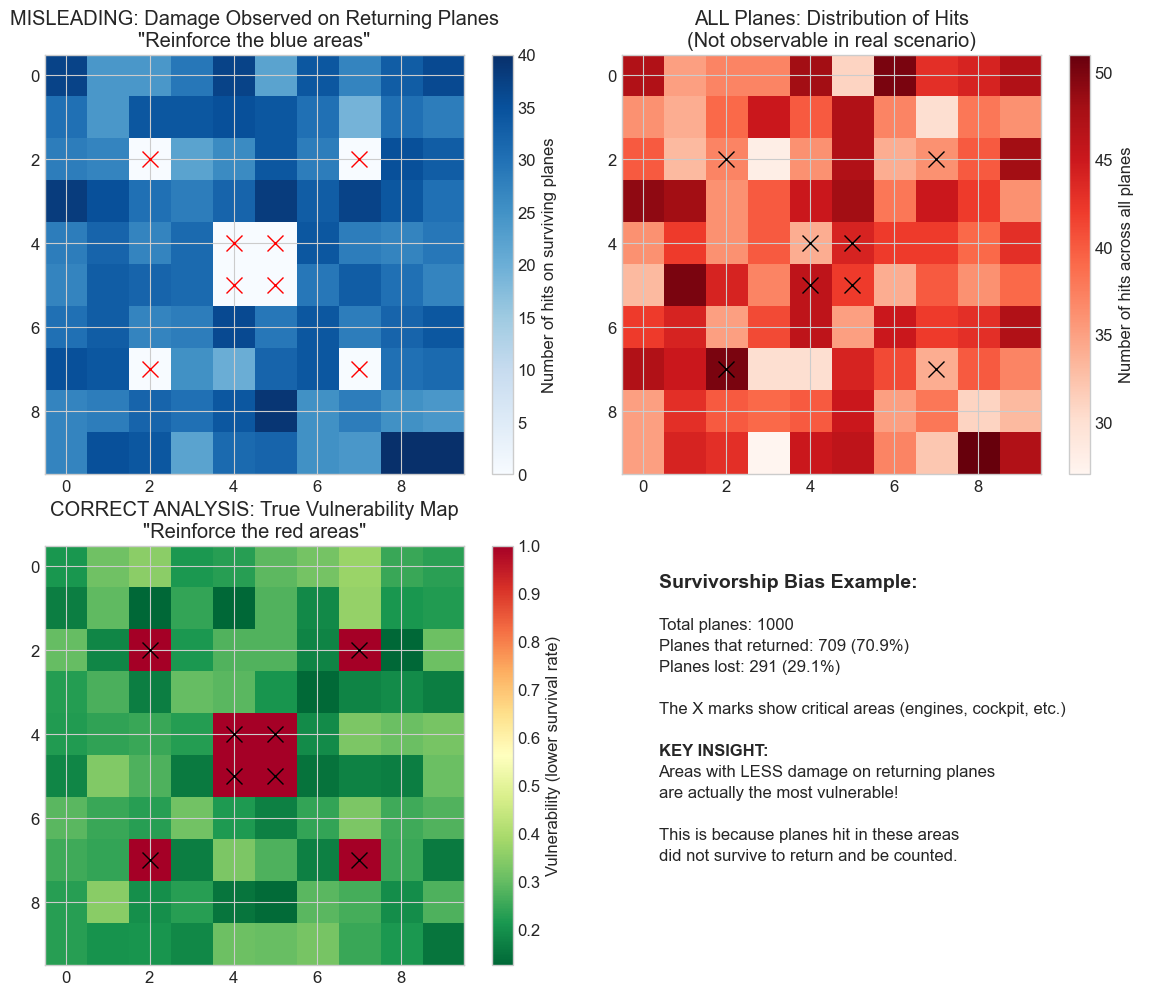

Lesson: Survivorship bias occurs when we only analyze samples that 'survived' a selection process.

In the classic WWII example:
1. Military officers wanted to add armor to planes where they saw the most bullet holes
2. Statistician Abraham Wald pointed out they were only seeing planes that survived
3. The absence of damage in certain areas on returning planes indicated that
   planes hit in those areas didn't survive to return
4. The correct conclusion: Add armor to the areas with FEWER bullet holes

Modern examples of survivorship bias:
- Successful entrepreneurs who dropped out of college (we don't hear about the failed ones)
- Investment strategies that look only at currently existing companies (ignoring defunct ones)
- Medical studies that only follow patients who complete the treatment


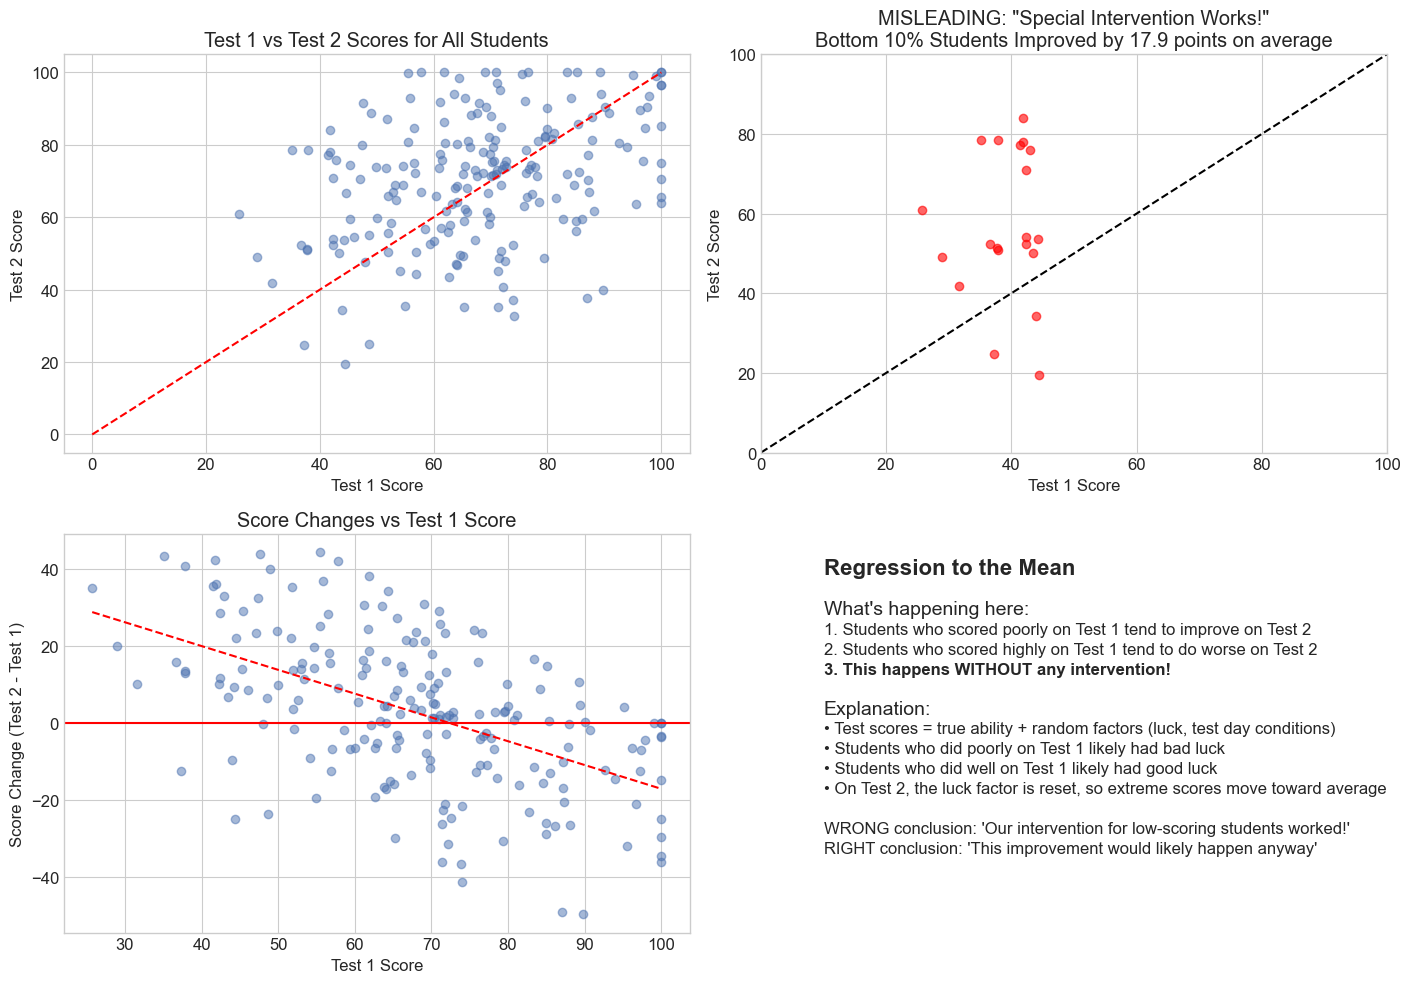

Regression to the Mean Analysis:
Average test 1 score: 68.0
Average test 2 score: 70.7

For bottom 10% of students in Test 1:
Average test 1 score: 39.0
Average test 2 score: 56.9
Average improvement: 17.9 points

For top 10% of students in Test 1:
Average test 1 score: 97.6
Average test 2 score: 84.9
Average change: -12.7 points

Lesson: Regression to the mean causes extreme values to move toward the average on subsequent measurements.
This often leads to false conclusions about interventions:
1. We identify 'poor performers' based on an initial measurement
2. We intervene to 'help' them
3. We observe improvement on the second measurement
4. We incorrectly attribute the improvement to our intervention
5. In reality, much of the improvement would have happened anyway

Famous examples:
- Sports 'Sophomore Slump': Athletes who have outstanding rookie seasons often perform worse in year 2
- The 'Sports Illustrated Cover Jinx': Athletes featured on the cover often perform worse afterward
-

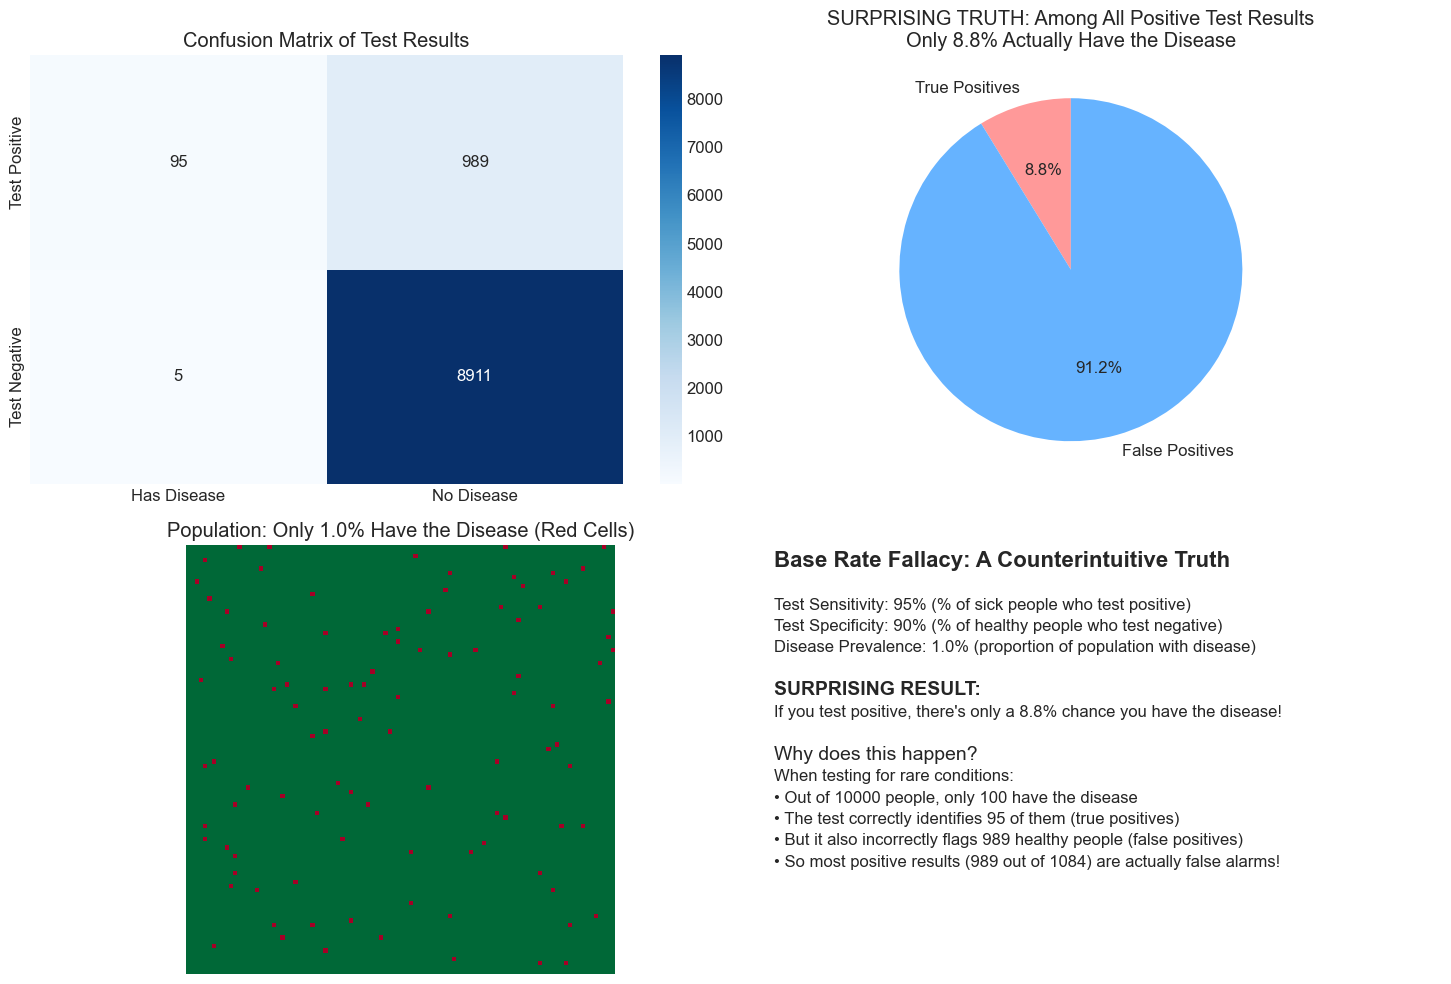

Base Rate Fallacy Analysis:
Population size: 10000
Disease prevalence: 1.0%
Number of people with disease: 100
Number of people without disease: 9900

Test characteristics:
Sensitivity: 95% (Probability of positive test if you have the disease)
Specificity: 90% (Probability of negative test if you don't have the disease)

Test results:
True positives: 95
False positives: 989
False negatives: 5
True negatives: 8911

Key insight:
Positive predictive value: 8.8%
If you test positive, there's only a 8.8% chance you actually have the disease!

Lesson: The base rate fallacy occurs when we ignore the underlying prevalence (base rate)
of a condition when interpreting test results.

Common examples:
1. Medical screening for rare diseases often has many false positives
2. Security systems that flag 'suspicious' behavior mostly flag innocent people
3. Profiling of rare characteristics (e.g., terrorists) mostly identifies innocent people

To avoid the base rate fallacy:
• Always consider the preva

In [6]:

# %%
def survivorship_bias():
    # Create a simulation of the classic WWII bomber survivorship bias example
    np.random.seed(42)
    
    # Create a figure that illustrates the concept
    plt.figure(figsize=(12, 10))
    
    # Part 1: Create a grid representing a plane
    # We'll create a simple representation with a grid
    grid_size = 10
    full_data = np.zeros((grid_size, grid_size))
    
    # Define critical areas (engines, cockpit, etc.) - these are the areas where damage means the plane doesn't return
    critical_areas = [(2, 2), (2, 7), (7, 2), (7, 7), (4, 4), (5, 4), (4, 5), (5, 5)]
    
    # Simulate 1000 planes getting hit randomly
    n_planes = 1000
    n_survived = 0
    survived_hits = []
    all_hits = []
    
    for _ in range(n_planes):
        # Each plane gets hit in 3-5 random locations
        n_hits = np.random.randint(3, 6)
        hits = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(n_hits)]
        all_hits.extend(hits)
        
        # Check if the plane survived (no hits in critical areas)
        hit_critical = any((h[0], h[1]) in critical_areas for h in hits)
        
        if not hit_critical:
            n_survived += 1
            survived_hits.extend(hits)
    
    # Create heatmaps for visualization
    all_hits_map = np.zeros((grid_size, grid_size))
    for hit in all_hits:
        all_hits_map[hit[0], hit[1]] += 1
    
    survived_hits_map = np.zeros((grid_size, grid_size))
    for hit in survived_hits:
        survived_hits_map[hit[0], hit[1]] += 1
    
    # Calculate the true vulnerability (inverse of the survival rate for each area)
    true_vulnerability = np.zeros((grid_size, grid_size))
    for i in range(grid_size):
        for j in range(grid_size):
            hits_in_cell = sum(1 for hit in all_hits if hit[0] == i and hit[1] == j)
            if hits_in_cell > 0:
                survived_in_cell = sum(1 for hit in survived_hits if hit[0] == i and hit[1] == j)
                true_vulnerability[i, j] = 1 - (survived_in_cell / hits_in_cell)
            else:
                true_vulnerability[i, j] = 0
    
    # Plot the misleading data (only looking at returned planes)
    plt.subplot(2, 2, 1)
    plt.imshow(survived_hits_map, cmap='Blues')
    plt.colorbar(label='Number of hits on surviving planes')
    plt.title('MISLEADING: Damage Observed on Returning Planes\n"Reinforce the blue areas"')
    
    # Mark the critical areas with red X's
    for area in critical_areas:
        plt.plot(area[1], area[0], 'rx', markersize=12)
    
    # Plot all planes hits
    plt.subplot(2, 2, 2)
    plt.imshow(all_hits_map, cmap='Reds')
    plt.colorbar(label='Number of hits across all planes')
    plt.title('ALL Planes: Distribution of Hits\n(Not observable in real scenario)')
    
    # Mark the critical areas with black X's
    for area in critical_areas:
        plt.plot(area[1], area[0], 'kx', markersize=12)
    
    # Plot the true vulnerability map
    plt.subplot(2, 2, 3)
    plt.imshow(true_vulnerability, cmap='RdYlGn_r')
    plt.colorbar(label='Vulnerability (lower survival rate)')
    plt.title('CORRECT ANALYSIS: True Vulnerability Map\n"Reinforce the red areas"')
    
    # Mark the critical areas with black X's
    for area in critical_areas:
        plt.plot(area[1], area[0], 'kx', markersize=12)
    
    # Text explanation 
    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.text(0.1, 0.9, "Survivorship Bias Example:", fontsize=14, fontweight='bold')
    plt.text(0.1, 0.8, f"Total planes: {n_planes}", fontsize=12)
    plt.text(0.1, 0.75, f"Planes that returned: {n_survived} ({n_survived/n_planes*100:.1f}%)", fontsize=12)
    plt.text(0.1, 0.7, f"Planes lost: {n_planes - n_survived} ({(n_planes-n_survived)/n_planes*100:.1f}%)", fontsize=12)
    plt.text(0.1, 0.6, "The X marks show critical areas (engines, cockpit, etc.)", fontsize=12)
    plt.text(0.1, 0.5, "KEY INSIGHT:", fontsize=12, fontweight='bold')
    plt.text(0.1, 0.45, "Areas with LESS damage on returning planes", fontsize=12)
    plt.text(0.1, 0.4, "are actually the most vulnerable!", fontsize=12)
    plt.text(0.1, 0.3, "This is because planes hit in these areas", fontsize=12)
    plt.text(0.1, 0.25, "did not survive to return and be counted.", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print("Lesson: Survivorship bias occurs when we only analyze samples that 'survived' a selection process.")
    print("\nIn the classic WWII example:")
    print("1. Military officers wanted to add armor to planes where they saw the most bullet holes")
    print("2. Statistician Abraham Wald pointed out they were only seeing planes that survived")
    print("3. The absence of damage in certain areas on returning planes indicated that")
    print("   planes hit in those areas didn't survive to return")
    print("4. The correct conclusion: Add armor to the areas with FEWER bullet holes")
    print("\nModern examples of survivorship bias:")
    print("- Successful entrepreneurs who dropped out of college (we don't hear about the failed ones)")
    print("- Investment strategies that look only at currently existing companies (ignoring defunct ones)")
    print("- Medical studies that only follow patients who complete the treatment")
    
    return survived_hits_map, true_vulnerability

# Run and display the survivorship bias example
survived_damage, true_vulnerability = survivorship_bias()

# %% [markdown]
# ## Example 7: Regression to the Mean
# 
# Regression to the mean is a statistical phenomenon where extreme measurements tend to be followed by measurements closer to the average. This can often be misinterpreted as a real effect of some intervention.

# %%
def regression_to_the_mean():
    # Set the random seed for reproducibility
    np.random.seed(123)
    
    # Generate data: test scores for 200 students across two tests
    # Assume each test has some skill component and some random luck component
    n_students = 200
    
    # Each student has an underlying skill level (normally distributed)
    true_skill = np.random.normal(70, 10, n_students)
    
    # Test scores are influenced by skill plus some random variation (luck)
    # The luck factor introduces regression to the mean
    test1_scores = true_skill + np.random.normal(0, 15, n_students)
    test2_scores = true_skill + np.random.normal(0, 15, n_students)
    
    # Create a DataFrame to store the data
    student_data = pd.DataFrame({
        'Student_ID': range(1, n_students + 1),
        'True_Skill': true_skill,
        'Test1_Score': np.clip(test1_scores, 0, 100),  # Clip to valid test score range
        'Test2_Score': np.clip(test2_scores, 0, 100)
    })
    
    # Calculate the change in scores
    student_data['Score_Change'] = student_data['Test2_Score'] - student_data['Test1_Score']
    
    # Identify the bottom 10% of students from Test 1 (who would receive "special attention")
    cutoff = np.percentile(student_data['Test1_Score'], 10)
    bottom_students = student_data[student_data['Test1_Score'] <= cutoff].copy()
    
    # Create the visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Scatter plot of Test 1 vs Test 2 scores for all students
    plt.subplot(2, 2, 1)
    plt.scatter(student_data['Test1_Score'], student_data['Test2_Score'], alpha=0.5)
    plt.plot([0, 100], [0, 100], 'r--')  # Line of no change
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.title('Test 1 vs Test 2 Scores for All Students')
    plt.grid(True)
    
    # MISLEADING ANALYSIS: focusing only on the bottom performers
    plt.subplot(2, 2, 2)
    plt.scatter(bottom_students['Test1_Score'], bottom_students['Test2_Score'], color='red', alpha=0.6)
    plt.plot([0, 100], [0, 100], 'k--')  # Line of no change
    
    # Calculate the average improvement for the bottom students
    avg_improvement = bottom_students['Score_Change'].mean()
    
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.title(f'MISLEADING: "Special Intervention Works!"\nBottom 10% Students Improved by {avg_improvement:.1f} points on average')
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.grid(True)
    
    # Plot 3: Score Changes vs Test 1 Score
    plt.subplot(2, 2, 3)
    plt.scatter(student_data['Test1_Score'], student_data['Score_Change'], alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Score Change (Test 2 - Test 1)')
    plt.title('Score Changes vs Test 1 Score')
    plt.grid(True)
    
    # Add a best fit line to show the trend
    z = np.polyfit(student_data['Test1_Score'], student_data['Score_Change'], 1)
    p = np.poly1d(z)
    plt.plot(np.sort(student_data['Test1_Score']), p(np.sort(student_data['Test1_Score'])), "r--")
    
    # Plot 4: Text explanation
    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.text(0.1, 0.9, "Regression to the Mean", fontsize=16, fontweight='bold')
    plt.text(0.1, 0.8, "What's happening here:", fontsize=14)
    plt.text(0.1, 0.75, "1. Students who scored poorly on Test 1 tend to improve on Test 2", fontsize=12)
    plt.text(0.1, 0.7, "2. Students who scored highly on Test 1 tend to do worse on Test 2", fontsize=12)
    plt.text(0.1, 0.65, "3. This happens WITHOUT any intervention!", fontsize=12, fontweight='bold')
    plt.text(0.1, 0.55, "Explanation:", fontsize=14)
    plt.text(0.1, 0.5, "• Test scores = true ability + random factors (luck, test day conditions)", fontsize=12)
    plt.text(0.1, 0.45, "• Students who did poorly on Test 1 likely had bad luck", fontsize=12)
    plt.text(0.1, 0.4, "• Students who did well on Test 1 likely had good luck", fontsize=12)
    plt.text(0.1, 0.35, "• On Test 2, the luck factor is reset, so extreme scores move toward average", fontsize=12)
    plt.text(0.1, 0.25, "WRONG conclusion: 'Our intervention for low-scoring students worked!'", fontsize=12)
    plt.text(0.1, 0.2, "RIGHT conclusion: 'This improvement would likely happen anyway'", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Additional analysis
    print("Regression to the Mean Analysis:")
    print(f"Average test 1 score: {student_data['Test1_Score'].mean():.1f}")
    print(f"Average test 2 score: {student_data['Test2_Score'].mean():.1f}")
    print("\nFor bottom 10% of students in Test 1:")
    print(f"Average test 1 score: {bottom_students['Test1_Score'].mean():.1f}")
    print(f"Average test 2 score: {bottom_students['Test2_Score'].mean():.1f}")
    print(f"Average improvement: {avg_improvement:.1f} points")
    
    # Top 10% analysis for comparison
    top_cutoff = np.percentile(student_data['Test1_Score'], 90)
    top_students = student_data[student_data['Test1_Score'] >= top_cutoff]
    top_avg_change = top_students['Score_Change'].mean()
    
    print("\nFor top 10% of students in Test 1:")
    print(f"Average test 1 score: {top_students['Test1_Score'].mean():.1f}")
    print(f"Average test 2 score: {top_students['Test2_Score'].mean():.1f}")
    print(f"Average change: {top_avg_change:.1f} points")
    
    print("\nLesson: Regression to the mean causes extreme values to move toward the average on subsequent measurements.")
    print("This often leads to false conclusions about interventions:")
    print("1. We identify 'poor performers' based on an initial measurement")
    print("2. We intervene to 'help' them")
    print("3. We observe improvement on the second measurement")
    print("4. We incorrectly attribute the improvement to our intervention")
    print("5. In reality, much of the improvement would have happened anyway")
    print("\nFamous examples:")
    print("- Sports 'Sophomore Slump': Athletes who have outstanding rookie seasons often perform worse in year 2")
    print("- The 'Sports Illustrated Cover Jinx': Athletes featured on the cover often perform worse afterward")
    print("- Medical treatments evaluated on patients at their worst point tend to show improvement")
    
    return student_data

# Run and display the regression to the mean example
student_data = regression_to_the_mean()

# %% [markdown]
# ## Example 8: The Base Rate Fallacy
# 
# The base rate fallacy occurs when we focus on specific information and ignore the underlying probability in the population. This often leads to overestimating the likelihood of rare events when testing for them.

# %%
def base_rate_fallacy():
    # Set up a hypothetical disease screening scenario
    population_size = 10000
    
    # Disease has a low prevalence in the population
    disease_prevalence = 0.01  # 1% of population has the disease
    
    # Test characteristics (realistic for many medical tests)
    sensitivity = 0.95  # 95% of sick people test positive (true positive rate)
    specificity = 0.90  # 90% of healthy people test negative (true negative rate)
    
    # Calculate the expected numbers in each category
    n_sick = int(population_size * disease_prevalence)
    n_healthy = population_size - n_sick
    
    # Testing outcomes
    true_positives = int(n_sick * sensitivity)
    false_negatives = n_sick - true_positives
    
    false_positives = int(n_healthy * (1 - specificity))
    true_negatives = n_healthy - false_positives
    
    # Create a DataFrame for visualization
    test_outcomes = pd.DataFrame({
        'Test_Result': ['Positive', 'Negative', 'Total'],
        'Has_Disease': [true_positives, false_negatives, n_sick],
        'No_Disease': [false_positives, true_negatives, n_healthy],
        'Total': [true_positives + false_positives, false_negatives + true_negatives, population_size]
    })
    
    # Calculate the positive predictive value (probability of having disease given positive test)
    ppv = true_positives / (true_positives + false_positives)
    
    # Create visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Confusion Matrix Heatmap
    plt.subplot(2, 2, 1)
    confusion_matrix = np.array([[true_positives, false_positives], 
                                 [false_negatives, true_negatives]])
    
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Has Disease', 'No Disease'],
                yticklabels=['Test Positive', 'Test Negative'])
    plt.title('Confusion Matrix of Test Results')
    
    # Plot 2: Visual representation of the positive test result breakdown
    plt.subplot(2, 2, 2)
    positive_results = [true_positives, false_positives]
    plt.pie(positive_results, labels=['True Positives', 'False Positives'], 
            autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'SURPRISING TRUTH: Among All Positive Test Results\nOnly {ppv*100:.1f}% Actually Have the Disease')
    
    # Plot 3: Base rate visualization
    plt.subplot(2, 2, 3)
    
    # Create a grid representing the population
    grid_size = 100  # 10x10 grid for 100 cells
    population_grid = np.zeros((grid_size, grid_size))
    
    # Mark disease cases (1% of the population)
    n_disease_cells = int(grid_size * grid_size * disease_prevalence)
    disease_indices = np.random.choice(grid_size * grid_size, n_disease_cells, replace=False)
    
    for idx in disease_indices:
        i, j = idx // grid_size, idx % grid_size
        population_grid[i, j] = 1
    
    plt.imshow(population_grid, cmap='RdYlGn_r')
    plt.title(f'Population: Only {disease_prevalence*100:.1f}% Have the Disease (Red Cells)')
    plt.axis('off')
    
    # Plot 4: Text explanation
    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.text(0.1, 0.95, "Base Rate Fallacy: A Counterintuitive Truth", fontsize=16, fontweight='bold')
    plt.text(0.1, 0.85, f"Test Sensitivity: {sensitivity*100:.0f}% (% of sick people who test positive)", fontsize=12)
    plt.text(0.1, 0.8, f"Test Specificity: {specificity*100:.0f}% (% of healthy people who test negative)", fontsize=12)
    plt.text(0.1, 0.75, f"Disease Prevalence: {disease_prevalence*100:.1f}% (proportion of population with disease)", fontsize=12)
    
    plt.text(0.1, 0.65, "SURPRISING RESULT:", fontsize=14, fontweight='bold')
    plt.text(0.1, 0.6, f"If you test positive, there's only a {ppv*100:.1f}% chance you have the disease!", fontsize=12)
    
    plt.text(0.1, 0.5, "Why does this happen?", fontsize=14)
    plt.text(0.1, 0.45, "When testing for rare conditions:", fontsize=12)
    plt.text(0.1, 0.4, f"• Out of {population_size} people, only {n_sick} have the disease", fontsize=12)
    plt.text(0.1, 0.35, f"• The test correctly identifies {true_positives} of them (true positives)", fontsize=12)
    plt.text(0.1, 0.3, f"• But it also incorrectly flags {false_positives} healthy people (false positives)", fontsize=12)
    plt.text(0.1, 0.25, f"• So most positive results ({false_positives} out of {true_positives+false_positives}) are actually false alarms!", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print additional analysis
    print("Base Rate Fallacy Analysis:")
    print(f"Population size: {population_size}")
    print(f"Disease prevalence: {disease_prevalence*100:.1f}%")
    print(f"Number of people with disease: {n_sick}")
    print(f"Number of people without disease: {n_healthy}")
    print("\nTest characteristics:")
    print(f"Sensitivity: {sensitivity*100:.0f}% (Probability of positive test if you have the disease)")
    print(f"Specificity: {specificity*100:.0f}% (Probability of negative test if you don't have the disease)")
    print("\nTest results:")
    print(f"True positives: {true_positives}")
    print(f"False positives: {false_positives}")
    print(f"False negatives: {false_negatives}")
    print(f"True negatives: {true_negatives}")
    print("\nKey insight:")
    print(f"Positive predictive value: {ppv*100:.1f}%")
    print(f"If you test positive, there's only a {ppv*100:.1f}% chance you actually have the disease!")
    
    print("\nLesson: The base rate fallacy occurs when we ignore the underlying prevalence (base rate)")
    print("of a condition when interpreting test results.")
    print("\nCommon examples:")
    print("1. Medical screening for rare diseases often has many false positives")
    print("2. Security systems that flag 'suspicious' behavior mostly flag innocent people")
    print("3. Profiling of rare characteristics (e.g., terrorists) mostly identifies innocent people")
    print("\nTo avoid the base rate fallacy:")
    print("• Always consider the prevalence of what you're testing for")
    print("• For rare conditions, confirm positive results with additional tests")
    print("• Be skeptical of claims about the accuracy of tests for rare phenomena")
    
    return test_outcomes

# Run and display the base rate fallacy example
test_outcomes = base_rate_fallacy()

# %% [markdown]
# ## Conclusion
# 
# These examples demonstrate common ways statistics can be manipulated to mislead:
# 
# 1. **Cherry-picking timeframes**: Selecting specific periods that support your narrative
# 2. **Simpson's Paradox**: When trends in subgroups reverse when data is combined
# 3. **Misleading with averages**: Using mean, median, or mode selectively to tell different stories
# 4. **Correlation vs. causation**: Assuming causation from correlation without proper evidence
# 5. **Axis manipulation**: Changing scales and ranges to exaggerate or minimize trends
# 
# When interpreting statistics, always ask critical questions:
# - What's the full context of this data?
# - Are there important subgroups or segments being hidden?
# - Which average is being used and why?
# - Is there evidence of causation beyond correlation?
# - Is the visualization designed to exaggerate or minimize effects?
# 
# Understanding these tricks will help you both avoid being misled and present data more honestly and transparently in your own work.